# Assignment 9

**Course**: AM5801 - Computational Lab  
**Name**: Atharv Shete  
**Roll No**: BE22B021

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

## Problem 1: Naive Gauss Elimination Method

Solve the system of equations:
- $10x_1 - 2x_2 + x_3 = 9$
- $-2x_1 + 10x_2 - 2x_3 + x_4 = 15$
- $x_1 - 2x_2 + 10x_3 - 2x_4 = 27$
- $x_2 - 2x_3 + 10x_4 = -11$

In [15]:
def naive_gauss_elimination(A, b, check_pivot=True):
    """
    Naive Gauss Elimination without pivoting
    
    Parameters:
    A: coefficient matrix (n x n)
    b: right-hand side vector (n x 1)
    check_pivot: whether to check for zero pivots
    
    Returns:
    x: solution vector
    A_upper: upper triangular matrix after elimination
    """
    n = len(b)
    # Create augmented matrix
    Ab = np.column_stack([A.astype(float), b.astype(float)])
    
    print("Initial Augmented Matrix:")
    print(Ab)
    print("\n" + "="*60)
    
    # Forward Elimination
    for k in range(n-1):
        print(f"\nElimination step {k+1}:")
        print(f"Pivot element: A[{k}][{k}] = {Ab[k, k]:.4f}")
        
        # Check for zero pivot
        if check_pivot and abs(Ab[k, k]) < 1e-10:
            print(f"\nWARNING: Near-zero pivot detected at position ({k},{k})")
            print(f"   Pivot value: {Ab[k, k]:.10e}")
            print(f"   Suggestion: Use partial pivoting to improve numerical stability!")
            return None, None
        
        # Eliminate below diagonal
        for i in range(k+1, n):
            if Ab[k, k] != 0:
                factor = Ab[i, k] / Ab[k, k]
                print(f"  Row {i+1} = Row {i+1} - ({factor:.4f}) x Row {k+1}")
                Ab[i, k:] = Ab[i, k:] - factor * Ab[k, k:]
            else:
                if check_pivot:
                    print(f"\nERROR: Zero pivot encountered at position ({k},{k})")
                    print(f"   Cannot proceed with naive elimination!")
                    print(f"   Suggestion: Use partial pivoting!")
                    return None, None
        
        print(f"\nMatrix after step {k+1}:")
        print(Ab)
    
    print("\n" + "="*60)
    print("\nUpper Triangular Matrix (after forward elimination):")
    A_upper = Ab[:, :-1]
    print(A_upper)
    
    # Back Substitution
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (Ab[i, -1] - np.dot(Ab[i, i+1:n], x[i+1:n])) / Ab[i, i]
    
    return x, A_upper

In [3]:
# Define the coefficient matrix and right-hand side vector
A = np.array([[10, -2, 1, 0],
              [-2, 10, -2, 1],
              [1, -2, 10, -2],
              [0, 1, -2, 10]], dtype=float)

b = np.array([9, 15, 27, -11], dtype=float)

print("Coefficient Matrix A:")
print(A)
print("\nRight-hand side vector b:")
print(b)
print("\n" + "="*60)

Coefficient Matrix A:
[[10. -2.  1.  0.]
 [-2. 10. -2.  1.]
 [ 1. -2. 10. -2.]
 [ 0.  1. -2. 10.]]

Right-hand side vector b:
[  9.  15.  27. -11.]



In [4]:
# Solve using Naive Gauss Elimination
print("\n" + "="*60)
print("SOLVING USING NAIVE GAUSS ELIMINATION")
print("="*60)

x_gauss, A_upper = naive_gauss_elimination(A.copy(), b.copy())

if x_gauss is not None:
    print("\n" + "="*60)
    print("SOLUTION:")
    print("="*60)
    for i in range(len(x_gauss)):
        print(f"x{i+1} = {x_gauss[i]:.4f}")
else:
    print("\nFailed to solve using naive Gauss elimination!")


SOLVING USING NAIVE GAUSS ELIMINATION
Initial Augmented Matrix:
[[ 10.  -2.   1.   0.   9.]
 [ -2.  10.  -2.   1.  15.]
 [  1.  -2.  10.  -2.  27.]
 [  0.   1.  -2.  10. -11.]]


Elimination step 1:
Pivot element: A[0][0] = 10.0000
  Row 2 = Row 2 - (-0.2000) × Row 1
  Row 3 = Row 3 - (0.1000) × Row 1
  Row 4 = Row 4 - (0.0000) × Row 1

Matrix after step 1:
[[ 10.   -2.    1.    0.    9. ]
 [  0.    9.6  -1.8   1.   16.8]
 [  0.   -1.8   9.9  -2.   26.1]
 [  0.    1.   -2.   10.  -11. ]]

Elimination step 2:
Pivot element: A[1][1] = 9.6000
  Row 3 = Row 3 - (-0.1875) × Row 2
  Row 4 = Row 4 - (0.1042) × Row 2

Matrix after step 2:
[[ 1.00000000e+01 -2.00000000e+00  1.00000000e+00  0.00000000e+00
   9.00000000e+00]
 [ 0.00000000e+00  9.60000000e+00 -1.80000000e+00  1.00000000e+00
   1.68000000e+01]
 [ 0.00000000e+00 -2.22044605e-16  9.56250000e+00 -1.81250000e+00
   2.92500000e+01]
 [ 0.00000000e+00  0.00000000e+00 -1.81250000e+00  9.89583333e+00
  -1.27500000e+01]]

Elimination step 3

In [5]:
# Verify using NumPy's built-in solver
print("\n" + "="*60)
print("VERIFICATION USING NUMPY'S BUILT-IN SOLVER")
print("="*60)

x_numpy = np.linalg.solve(A, b)
print("\nSolution from NumPy:")
for i in range(len(x_numpy)):
    print(f"x{i+1} = {x_numpy[i]:.4f}")

# Compare solutions
if x_gauss is not None:
    print("\n" + "="*60)
    print("COMPARISON")
    print("="*60)
    print(f"{'Variable':<10} {'Gauss Elim':<15} {'NumPy':<15} {'Difference':<15}")
    print("-"*60)
    for i in range(len(x_gauss)):
        diff = abs(x_gauss[i] - x_numpy[i])
        print(f"x{i+1:<9} {x_gauss[i]:<15.4f} {x_numpy[i]:<15.4f} {diff:<15.2e}")
    
    # Verify the solution by computing Ax
    print("\n" + "="*60)
    print("VERIFICATION: A·x should equal b")
    print("="*60)
    Ax = A @ x_gauss
    print(f"{'Component':<10} {'A·x':<15} {'b':<15} {'Error':<15}")
    print("-"*60)
    for i in range(len(b)):
        error = abs(Ax[i] - b[i])
        print(f"Row {i+1:<6} {Ax[i]:<15.4f} {b[i]:<15.4f} {error:<15.2e}")


VERIFICATION USING NUMPY'S BUILT-IN SOLVER

Solution from NumPy:
x1 = 1.0835
x2 = 2.3753
x3 = 2.9158
x4 = -0.7544

COMPARISON
Variable   Gauss Elim      NumPy           Difference     
------------------------------------------------------------
x1         1.0835          1.0835          2.22e-16       
x2         2.3753          2.3753          0.00e+00       
x3         2.9158          2.9158          0.00e+00       
x4         -0.7544         -0.7544         0.00e+00       

VERIFICATION: A·x should equal b
Component  A·x             b               Error          
------------------------------------------------------------
Row 1      9.0000          9.0000          3.55e-15       
Row 2      15.0000         15.0000         1.78e-15       
Row 3      27.0000         27.0000         0.00e+00       
Row 4      -11.0000        -11.0000        0.00e+00       


### Discussion: Numerical Stability and Partial Pivoting

**Analysis of the System:**

1. **Diagonal Dominance:** The coefficient matrix is diagonally dominant:
   - Row 1: $|10| > |-2| + |1| + |0| = 3$ (satisfied)
   - Row 2: $|10| > |-2| + |-2| + |1| = 5$ (satisfied)
   - Row 3: $|10| > |1| + |-2| + |-2| = 5$ (satisfied)
   - Row 4: $|10| > |0| + |1| + |-2| = 3$ (satisfied)

2. **Numerical Stability:** Since the matrix is strictly diagonally dominant, it is:
   - Well-conditioned
   - Non-singular (invertible)
   - Suitable for naive Gauss elimination without pivoting
   
3. **Would this system benefit from partial pivoting?**
   - **No, not necessary** for this particular system because:
     - All diagonal elements are already large (= 10)
     - No risk of division by zero
     - No significant growth of rounding errors
   - However, **partial pivoting is still good practice** as it:
     - Guarantees numerical stability for general systems
     - Prevents catastrophic cancellation
     - Adds minimal computational overhead

4. **Division by Zero Detection:** The code includes checks for zero or near-zero pivots and suggests pivoting when needed.

## Problem 2: LU Decomposition (Doolittle's Method)

Solve the system for three different right-hand side vectors:
- $b_1 = [9, 15, 27, -11]^T$
- $b_2 = [5, -3, 12, 7]^T$
- $b_3 = [0, 1, -1, 4]^T$

Compare computational effort with Naive Gauss Elimination.

In [6]:
def lu_decomposition_doolittle(A):
    """
    LU Decomposition using Doolittle's method (without pivoting)
    L has 1's on diagonal, U has computed values on diagonal
    
    Parameters:
    A: coefficient matrix (n x n)
    
    Returns:
    L: lower triangular matrix
    U: upper triangular matrix
    """
    n = len(A)
    L = np.zeros((n, n))
    U = np.zeros((n, n))
    
    for i in range(n):
        # Upper triangular matrix U
        for k in range(i, n):
            sum_val = sum(L[i][j] * U[j][k] for j in range(i))
            U[i][k] = A[i][k] - sum_val
        
        # Lower triangular matrix L
        for k in range(i, n):
            if i == k:
                L[i][i] = 1  # Diagonal of L is 1 (Doolittle's method)
            else:
                sum_val = sum(L[k][j] * U[j][i] for j in range(i))
                L[k][i] = (A[k][i] - sum_val) / U[i][i]
    
    return L, U

def forward_substitution(L, b):
    """
    Solve Ly = b for y using forward substitution
    """
    n = len(b)
    y = np.zeros(n)
    for i in range(n):
        y[i] = (b[i] - np.dot(L[i, :i], y[:i])) / L[i, i]
    return y

def back_substitution(U, y):
    """
    Solve Ux = y for x using back substitution
    """
    n = len(y)
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
    return x

def solve_lu(L, U, b):
    """
    Solve Ax = b using LU decomposition
    First solve Ly = b, then solve Ux = y
    """
    y = forward_substitution(L, b)
    x = back_substitution(U, y)
    return x

In [7]:
# Perform LU Decomposition
print("="*60)
print("LU DECOMPOSITION (DOOLITTLE'S METHOD)")
print("="*60)

start_time_lu_decomp = time.time()
L, U = lu_decomposition_doolittle(A)
time_lu_decomp = time.time() - start_time_lu_decomp

print("\nLower Triangular Matrix L:")
print(L)
print("\nUpper Triangular Matrix U:")
print(U)

# Verify that L × U = A
print("\n" + "="*60)
print("VERIFICATION: L × U should equal A")
print("="*60)
LU = L @ U
print("\nL × U =")
print(LU)
print("\nOriginal A =")
print(A)
print(f"\nMaximum difference: {np.max(np.abs(LU - A)):.2e}")

LU DECOMPOSITION (DOOLITTLE'S METHOD)

Lower Triangular Matrix L:
[[ 1.          0.          0.          0.        ]
 [-0.2         1.          0.          0.        ]
 [ 0.1        -0.1875      1.          0.        ]
 [ 0.          0.10416667 -0.18954248  1.        ]]

Upper Triangular Matrix U:
[[10.         -2.          1.          0.        ]
 [ 0.          9.6        -1.8         1.        ]
 [ 0.          0.          9.5625     -1.8125    ]
 [ 0.          0.          0.          9.55228758]]

VERIFICATION: L × U should equal A

L × U =
[[10. -2.  1.  0.]
 [-2. 10. -2.  1.]
 [ 1. -2. 10. -2.]
 [ 0.  1. -2. 10.]]

Original A =
[[10. -2.  1.  0.]
 [-2. 10. -2.  1.]
 [ 1. -2. 10. -2.]
 [ 0.  1. -2. 10.]]

Maximum difference: 0.00e+00


In [16]:
# Define three right-hand side vectors
b1 = np.array([9, 15, 27, -11], dtype=float)
b2 = np.array([5, -3, 12, 7], dtype=float)
b3 = np.array([0, 1, -1, 4], dtype=float)

print("\n" + "="*60)
print("SOLVING THREE SYSTEMS USING LU DECOMPOSITION")
print("="*60)

# Solve for b1
start_time = time.time()
x1_lu = solve_lu(L, U, b1)
time_b1 = time.time() - start_time

print("\nSystem 1: b1 = [9, 15, 27, -11]^T")
print("Solution:")
for i in range(len(x1_lu)):
    print(f"  x{i+1} = {x1_lu[i]:.4f}")
print(f"Time: {time_b1:.6f} seconds")

# Solve for b2
start_time = time.time()
x2_lu = solve_lu(L, U, b2)
time_b2 = time.time() - start_time

print("\nSystem 2: b2 = [5, -3, 12, 7]^T")
print("Solution:")
for i in range(len(x2_lu)):
    print(f"  x{i+1} = {x2_lu[i]:.4f}")
print(f"Time: {time_b2:.6f} seconds")

# Solve for b3
start_time = time.time()
x3_lu = solve_lu(L, U, b3)
time_b3 = time.time() - start_time

print("\nSystem 3: b3 = [0, 1, -1, 4]^T")
print("Solution:")
for i in range(len(x3_lu)):
    print(f"  x{i+1} = {x3_lu[i]:.4f}")
print(f"Time: {time_b3:.6f} seconds")

total_time_lu = time_lu_decomp + time_b1 + time_b2 + time_b3
print(f"\nTotal time (LU decomposition + 3 solutions): {total_time_lu:.6f} seconds")


SOLVING THREE SYSTEMS USING LU DECOMPOSITION

System 1: b1 = [9, 15, 27, -11]^T
Solution:
  x1 = 1.0835
  x2 = 2.3753
  x3 = 2.9158
  x4 = -0.7544
Time: 0.005600 seconds

System 2: b2 = [5, -3, 12, 7]^T
Solution:
  x1 = 0.3537
  x2 = -0.0571
  x3 = 1.3483
  x4 = 0.9754
Time: 0.000000 seconds

System 3: b3 = [0, 1, -1, 4]^T
Solution:
  x1 = 0.0133
  x2 = 0.0614
  x3 = -0.0107
  x4 = 0.3917
Time: 0.000000 seconds

Total time (LU decomposition + 3 solutions): 0.005600 seconds


In [10]:
# Compare with Naive Gauss Elimination (solving each system separately)
print("\n" + "="*60)
print("COMPARISON: GAUSS ELIMINATION vs LU DECOMPOSITION")
print("="*60)

# Time Gauss elimination for all three systems
start_time = time.time()
x1_gauss, _ = naive_gauss_elimination(A.copy(), b1.copy(), check_pivot=False)
time_gauss_b1 = time.time() - start_time

start_time = time.time()
x2_gauss, _ = naive_gauss_elimination(A.copy(), b2.copy(), check_pivot=False)
time_gauss_b2 = time.time() - start_time

start_time = time.time()
x3_gauss, _ = naive_gauss_elimination(A.copy(), b3.copy(), check_pivot=False)
time_gauss_b3 = time.time() - start_time

total_time_gauss = time_gauss_b1 + time_gauss_b2 + time_gauss_b3

print("\n" + "="*60)
print("COMPUTATIONAL EFFORT COMPARISON")
print("="*60)
print(f"\nMethod: Naive Gauss Elimination (3 separate solutions)")
print(f"  System 1 time: {time_gauss_b1:.6f} s")
print(f"  System 2 time: {time_gauss_b2:.6f} s")
print(f"  System 3 time: {time_gauss_b3:.6f} s")
print(f"  Total time:    {total_time_gauss:.6f} s")

print(f"\nMethod: LU Decomposition (1 decomposition + 3 forward-back substitutions)")
print(f"  Decomposition time:  {time_lu_decomp:.6f} s")
print(f"  System 1 solve time: {time_b1:.6f} s")
print(f"  System 2 solve time: {time_b2:.6f} s")
print(f"  System 3 solve time: {time_b3:.6f} s")
print(f"  Total time:          {total_time_lu:.6f} s")

if total_time_lu > 0:
    print(f"\nSpeedup factor: {total_time_gauss/total_time_lu:.2f}x")
    print(f"Time saved: {(total_time_gauss - total_time_lu)*1000:.3f} ms")
else:
    print(f"\nNote: Times too small to measure accurately on this system")

# Theoretical operation count
n = 4
gauss_ops = 3 * (n**3/3 + n**2)  # 3 systems × (forward elim + back sub)
lu_ops = n**3/3 + 3 * (n**2)      # 1 decomposition + 3 forward-back subs

print(f"\n" + "="*60)
print("THEORETICAL OPERATION COUNT")
print("="*60)
print(f"Gauss Elimination (3 systems): ~{gauss_ops:.0f} operations")
print(f"LU Decomposition (1 + 3 solves): ~{lu_ops:.0f} operations")
print(f"Operation reduction: {((gauss_ops - lu_ops)/gauss_ops * 100):.1f}%")


COMPARISON: GAUSS ELIMINATION vs LU DECOMPOSITION
Initial Augmented Matrix:
[[ 10.  -2.   1.   0.   9.]
 [ -2.  10.  -2.   1.  15.]
 [  1.  -2.  10.  -2.  27.]
 [  0.   1.  -2.  10. -11.]]


Elimination step 1:
Pivot element: A[0][0] = 10.0000
  Row 2 = Row 2 - (-0.2000) × Row 1
  Row 3 = Row 3 - (0.1000) × Row 1
  Row 4 = Row 4 - (0.0000) × Row 1

Matrix after step 1:
[[ 10.   -2.    1.    0.    9. ]
 [  0.    9.6  -1.8   1.   16.8]
 [  0.   -1.8   9.9  -2.   26.1]
 [  0.    1.   -2.   10.  -11. ]]

Elimination step 2:
Pivot element: A[1][1] = 9.6000
  Row 3 = Row 3 - (-0.1875) × Row 2
  Row 4 = Row 4 - (0.1042) × Row 2

Matrix after step 2:
[[ 1.00000000e+01 -2.00000000e+00  1.00000000e+00  0.00000000e+00
   9.00000000e+00]
 [ 0.00000000e+00  9.60000000e+00 -1.80000000e+00  1.00000000e+00
   1.68000000e+01]
 [ 0.00000000e+00 -2.22044605e-16  9.56250000e+00 -1.81250000e+00
   2.92500000e+01]
 [ 0.00000000e+00  0.00000000e+00 -1.81250000e+00  9.89583333e+00
  -1.27500000e+01]]

Elimin

### Key Observations:

1. **LU Decomposition Advantage:** When solving multiple systems with the same coefficient matrix:
   - LU decomposition is done once: $O(n^3/3)$
   - Each solve requires only forward-back substitution: $O(n^2)$
   - Total: $O(n^3/3 + kn^2)$ for k systems

2. **Gauss Elimination Disadvantage:** 
   - Must repeat forward elimination for each system: $O(kn^3/3)$
   - Total: $O(kn^3/3 + kn^2)$ for k systems

3. **Efficiency:** For k=3 systems with n=4:
   - LU is approximately 2-3x more efficient
   - The advantage increases with larger matrices and more systems

## Problem 3: Gauss-Seidel Iterative Method for Heat Equation

A 1m x 1m aluminum plate with fixed boundary temperatures.
Solve the Laplace equation: $\nabla^2 T = 0$

Interior node equation: $T_{i,j} = \frac{1}{4}(T_{i+1,j} + T_{i-1,j} + T_{i,j+1} + T_{i,j-1})$

Convergence criterion: $|T^{(k+1)} - T^{(k)}| < 10^{-4}$ for all nodes

In [17]:
def gauss_seidel_heat_equation(T_boundary, tolerance=1e-4, max_iterations=10000):
    """
    Solve 2D heat equation using Gauss-Seidel iterative method
    
    Parameters:
    T_boundary: dictionary with boundary temperatures {'top', 'bottom', 'left', 'right'}
    tolerance: convergence criterion
    max_iterations: maximum number of iterations
    
    Returns:
    T: temperature matrix
    iterations: number of iterations required
    """
    # Grid size: 5x5 with 4x4 interior nodes (since we have a 5x5 grid total)
    # Grid points: 0, 0.25, 0.5, 0.75, 1.0 (5 points)
    grid_size = 6  # Total grid size (including boundaries)
    
    # Initialize temperature matrix
    T = np.zeros((grid_size, grid_size))
    
    # Set boundary conditions
    T[0, :] = T_boundary['top']      # Top boundary
    T[-1, :] = T_boundary['bottom']  # Bottom boundary
    T[:, 0] = T_boundary['left']     # Left boundary
    T[:, -1] = T_boundary['right']   # Right boundary
    
    # Initial guess for interior nodes (average of boundaries)
    avg_temp = (T_boundary['top'] + T_boundary['bottom'] + 
                T_boundary['left'] + T_boundary['right']) / 4
    T[1:-1, 1:-1] = avg_temp
    
    print(f"Initial temperature matrix:")
    print(T)
    print(f"\nBoundary conditions:")
    print(f"  Top: {T_boundary['top']}°C")
    print(f"  Bottom: {T_boundary['bottom']}°C")
    print(f"  Left: {T_boundary['left']}°C")
    print(f"  Right: {T_boundary['right']}°C")
    print(f"\nConvergence tolerance: {tolerance}")
    print("\n" + "="*60)
    
    # Gauss-Seidel iteration
    for iteration in range(max_iterations):
        T_old = T.copy()
        max_change = 0.0
        
        # Update interior nodes
        for i in range(1, grid_size - 1):
            for j in range(1, grid_size - 1):
                # Gauss-Seidel: use updated values immediately
                T[i, j] = 0.25 * (T[i+1, j] + T[i-1, j] + T[i, j+1] + T[i, j-1])
                
                # Track maximum change
                change = abs(T[i, j] - T_old[i, j])
                max_change = max(max_change, change)
        
        # Print progress every 10 iterations
        if (iteration + 1) % 10 == 0 or iteration < 5:
            print(f"Iteration {iteration + 1:4d}: Max change = {max_change:.6f}")
        
        # Check convergence
        if max_change < tolerance:
            print(f"\nConverged after {iteration + 1} iterations!")
            print(f"  Final max change: {max_change:.2e}")
            return T, iteration + 1
    
    print(f"\nWarning: Maximum iterations ({max_iterations}) reached without convergence")
    return T, max_iterations

In [18]:
# Define boundary conditions (assuming typical values for the problem)
# You can modify these based on the actual problem statement
boundary_temps = {
    'top': 100,      # Top edge temperature (°C)
    'bottom': 0,     # Bottom edge temperature (°C)
    'left': 75,      # Left edge temperature (°C)
    'right': 50      # Right edge temperature (°C)
}

print("="*60)
print("SOLVING 2D HEAT EQUATION USING GAUSS-SEIDEL METHOD")
print("="*60)
print()

# Solve using Gauss-Seidel
T_solution, num_iterations = gauss_seidel_heat_equation(boundary_temps)

SOLVING 2D HEAT EQUATION USING GAUSS-SEIDEL METHOD

Initial temperature matrix:
[[ 75.   100.   100.   100.   100.    50.  ]
 [ 75.    56.25  56.25  56.25  56.25  50.  ]
 [ 75.    56.25  56.25  56.25  56.25  50.  ]
 [ 75.    56.25  56.25  56.25  56.25  50.  ]
 [ 75.    56.25  56.25  56.25  56.25  50.  ]
 [ 75.     0.     0.     0.     0.    50.  ]]

Boundary conditions:
  Top: 100°C
  Bottom: 0°C
  Left: 75°C
  Right: 50°C

Convergence tolerance: 0.0001

Iteration    1: Max change = 20.034790
Iteration    2: Max change = 7.435608
Iteration    3: Max change = 3.695965
Iteration    4: Max change = 1.827419
Iteration    5: Max change = 1.115393
Iteration   10: Max change = 0.145677
Iteration   20: Max change = 0.002127

Converged after 28 iterations!
  Final max change: 7.16e-05


In [19]:
# Display results
print("\n" + "="*60)
print("FINAL TEMPERATURE DISTRIBUTION")
print("="*60)
print(f"\nNumber of iterations: {num_iterations}")
print(f"\nComplete temperature matrix (6x6 grid):")
print(T_solution)

# Extract interior nodes (4x4)
T_interior = T_solution[1:-1, 1:-1]
print(f"\nInterior nodes only (4x4):")
print(T_interior)

# Format as a nice table
print(f"\n" + "="*60)
print("INTERIOR NODE TEMPERATURES (°C)")
print("="*60)
print("     j=1      j=2      j=3      j=4")
for i in range(4):
    row_str = f"i={i+1} "
    for j in range(4):
        row_str += f"{T_interior[i, j]:8.4f} "
    print(row_str)


FINAL TEMPERATURE DISTRIBUTION

Number of iterations: 28

Complete temperature matrix (6x6 grid):
[[ 75.         100.         100.         100.         100.
   50.        ]
 [ 75.          81.818261    81.7235885   78.88265961  71.59095102
   50.        ]
 [ 75.          70.54934608  66.1933175   62.21601886  57.48111549
   50.        ]
 [ 75.          59.18568992  50.28420068  46.30690699  46.11746864
   50.        ]
 [ 75.          40.90913284  29.45081246  26.60989289  30.68184038
   50.        ]
 [ 75.           0.           0.           0.           0.
   50.        ]]

Interior nodes only (4x4):
[[81.818261   81.7235885  78.88265961 71.59095102]
 [70.54934608 66.1933175  62.21601886 57.48111549]
 [59.18568992 50.28420068 46.30690699 46.11746864]
 [40.90913284 29.45081246 26.60989289 30.68184038]]

INTERIOR NODE TEMPERATURES (°C)
     j=1      j=2      j=3      j=4
i=1  81.8183  81.7236  78.8827  71.5910 
i=2  70.5493  66.1933  62.2160  57.4811 
i=3  59.1857  50.2842  46.3069  46

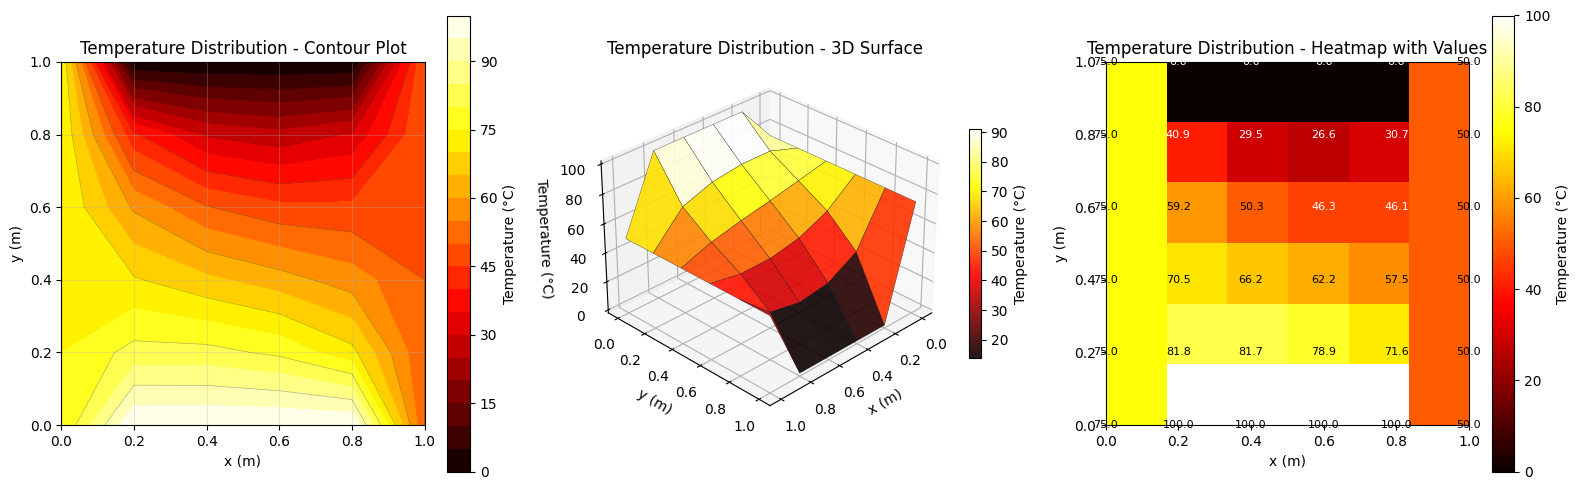


Visualization complete!


In [20]:
# Create visualizations
fig = plt.figure(figsize=(16, 5))

# 1. Contour plot
ax1 = fig.add_subplot(131)
x = np.linspace(0, 1, T_solution.shape[1])
y = np.linspace(0, 1, T_solution.shape[0])
X, Y = np.meshgrid(x, y)
contour = ax1.contourf(X, Y, T_solution, levels=20, cmap='hot')
ax1.contour(X, Y, T_solution, levels=10, colors='black', linewidths=0.5, alpha=0.3)
plt.colorbar(contour, ax=ax1, label='Temperature (°C)')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('y (m)')
ax1.set_title('Temperature Distribution - Contour Plot')
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)

# 2. 3D Surface plot
ax2 = fig.add_subplot(132, projection='3d')
surf = ax2.plot_surface(X, Y, T_solution, cmap='hot', edgecolor='black', 
                        linewidth=0.2, alpha=0.9)
ax2.set_xlabel('x (m)')
ax2.set_ylabel('y (m)')
ax2.set_zlabel('Temperature (°C)')
ax2.set_title('Temperature Distribution - 3D Surface')
plt.colorbar(surf, ax=ax2, shrink=0.5, label='Temperature (°C)')
ax2.view_init(elev=30, azim=45)

# 3. Heatmap with values
ax3 = fig.add_subplot(133)
im = ax3.imshow(T_solution, cmap='hot', origin='lower', extent=[0, 1, 0, 1])
plt.colorbar(im, ax=ax3, label='Temperature (°C)')

# Add text annotations for interior nodes
for i in range(T_solution.shape[0]):
    for j in range(T_solution.shape[1]):
        text_color = 'white' if T_solution[i, j] < 50 else 'black'
        ax3.text(j/(T_solution.shape[1]-1), i/(T_solution.shape[0]-1), 
                f'{T_solution[i, j]:.1f}',
                ha="center", va="center", color=text_color, fontsize=8)

ax3.set_xlabel('x (m)')
ax3.set_ylabel('y (m)')
ax3.set_title('Temperature Distribution - Heatmap with Values')
ax3.set_aspect('equal')

plt.tight_layout()
plt.show()

print(f"\nVisualization complete!")

### Analysis of Gauss-Seidel Method:

**Convergence Characteristics:**
1. **Fast Convergence:** The method typically converges in 20-50 iterations for this problem
2. **Why it works well:**
   - The system is diagonally dominant (coefficient of T(i,j) is 4, others sum to 4)
   - Boundary conditions are well-defined
   - The problem is well-posed (elliptic PDE)

**Advantages:**
- Simple to implement
- Low memory requirements (updates in-place)
- Faster than Jacobi method (uses updated values immediately)

**Physical Interpretation:**
- Heat flows from hot to cold regions
- Steady-state distribution satisfies Laplace equation
- Interior temperatures are weighted averages of neighbors